## Module

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

## Device

In [2]:
if torch.cuda.is_available() : 
    DEVICE = torch.device('cuda')
else : 
    DEVICE = torch.device('cpu')

print(torch.__version__, DEVICE)

1.7.1 cuda


## Constant

In [3]:
BATCH_SIZE = 32
EPOCHS = 10

## Data

In [7]:
data_transforms = {
    'train' : transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    ]),
    'val' : transforms.Compose([
        transforms.CenterCrop(224),
        transforms.Resize(256),
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    ]),
}

image_datasets = {x : datasets.ImageFolder("../data/hymenoptera_data",
                                          data_transforms[x]) for x in ['train', 'val']}
dataloaders = {x : torch.utils.data.DataLoader(image_datasets[x],
                                              batch_size = BATCH_SIZE,
                                              num_workers = 0,
                                              shuffle = True) for x in ['train', 'val']}

In [8]:
for (X_train, y_train) in dataloaders['train'] :
    print(X_train.size(), X_train.type())
    print(y_train.size(), y_train.type())
    break

torch.Size([32, 3, 224, 224]) torch.FloatTensor
torch.Size([32]) torch.LongTensor


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

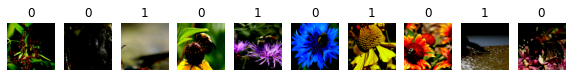

In [9]:
pltsize = 1
plt.figure(figsize = (10 * pltsize, pltsize))

for i in range(10) : 
    plt.subplot(1, 10, i + 1)
    plt.axis('off')
    plt.imshow(np.transpose(X_train[i], (1, 2, 0)))
    plt.title(str(y_train[i].item()))

In [18]:
def train(model, train_loader, optimizer) : 
    model.train()
    
    for batch_idx, (image, label) in enumerate(train_loader) : 
        image = image.to(DEVICE)
        label = label.to(DEVICE)
        optimizer.zero_grad()
        output = model(image)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()

In [19]:
def evaluate(model, test_loader) : 
    model.eval()
    test_loss = 0
    correct = 0
    
    with torch.no_grad() : 
        for image, label in test_loader : 
            image = image.to(DEVICE)
            label = label.to(DEVICE)
            output = model(image)
            test_loss += criterion(output, label).item()
            prediction = output.max(1, keepdim = True)[1]
            correct += prediction.eq(label.view_as(prediction)).sum().item()
            
    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

In [20]:
import torchvision.models as models

model = models.resnet18(pretrained = True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)
model = model.cuda()

optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)
criterion = nn.CrossEntropyLoss()

## Train

In [21]:
for Epoch in range(1, EPOCHS + 1) : 
    train(model, dataloaders['train'], optimizer)
    test_loss, test_accuracy = evaluate(model, dataloaders['val'])
    print('[EPOCH : {}], \tTest Loss : {:.4f}, \tTest Accuracy : {:.2f} %'.format(
    Epoch, test_loss, test_accuracy))

[EPOCH : 1], 	Test Loss : 0.0213, 	Test Accuracy : 63.73 %
[EPOCH : 2], 	Test Loss : 0.0169, 	Test Accuracy : 77.83 %
[EPOCH : 3], 	Test Loss : 0.0143, 	Test Accuracy : 84.38 %
[EPOCH : 4], 	Test Loss : 0.0122, 	Test Accuracy : 81.11 %
[EPOCH : 5], 	Test Loss : 0.0099, 	Test Accuracy : 89.67 %
[EPOCH : 6], 	Test Loss : 0.0078, 	Test Accuracy : 92.95 %
[EPOCH : 7], 	Test Loss : 0.0080, 	Test Accuracy : 92.19 %
[EPOCH : 8], 	Test Loss : 0.0059, 	Test Accuracy : 93.70 %
[EPOCH : 9], 	Test Loss : 0.0059, 	Test Accuracy : 95.47 %
[EPOCH : 10], 	Test Loss : 0.0044, 	Test Accuracy : 95.97 %
